All unique segments in all the lambdas:
Total unique segments: 35
[('MSOTOL01', 'NFO-117'), ('NFO-006', 'NFO-027'), ('NFO-022', 'NFO-053'), ('MSOTOL01', 'NFO-004'), ('MSOMEX04', 'MSOTOL01'), ('MSOPUE01', 'NFO-053'), ('MSOGDL01', 'MSOGDL02', 'ruta_2'), ('NFO-009', 'NFO-040'), ('MSOMTY02', 'NFO-076'), ('MSOMEX04', 'NFO-004'), ('NFO-006', 'NFO-117'), ('MSOGDL02', 'NFO-032'), ('NFO-009', 'NFO-025'), ('NFO-032', 'NFO-040'), ('NFO-006', 'NFO-032'), ('NFO-025', 'NFO-044'), ('MSOGDL01', 'MSOGDL02', 'ruta_1'), ('MSOMTY01', 'MSOMTY03'), ('MSOMTY01', 'MSOMTY02'), ('NFO-027', 'NFO-044'), ('NFO-022', 'TAMREY1273'), ('MSOMEX01', 'MSOMEX04', 'ruta_2'), ('NFO-025', 'NFO-075'), ('MSOMEX04', 'NFO-040'), ('MSOMEX04', 'NFO-010'), ('MSOMTY02', 'MSOMTY03'), ('NFO-004', 'NFO-009'), ('NFO-022', 'NFO-075'), ('MSOGDL02', 'NFO-006'), ('MSOMTY02', 'NFO-075'), ('NFO-044', 'NFO-076'), ('MSOPUE01', 'NFO-010'), ('NFO-075', 'NFO-076'), ('MSOMEX01', 'MSOMEX04', 'ruta_1'), ('NFO-038', 'NFO-076')]

Segment lists for each

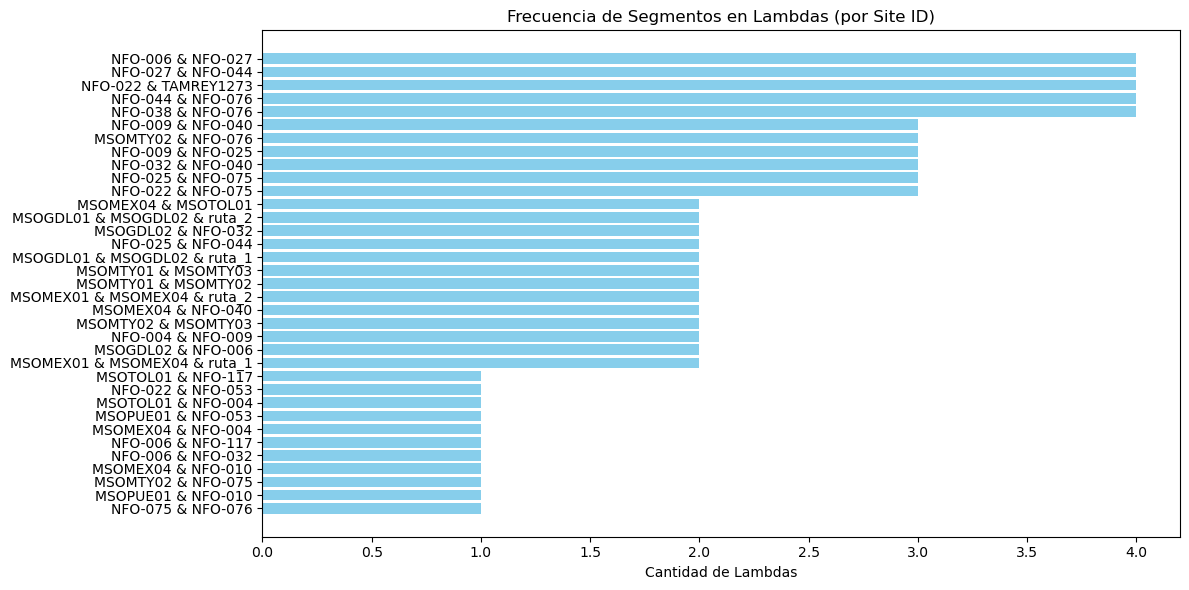

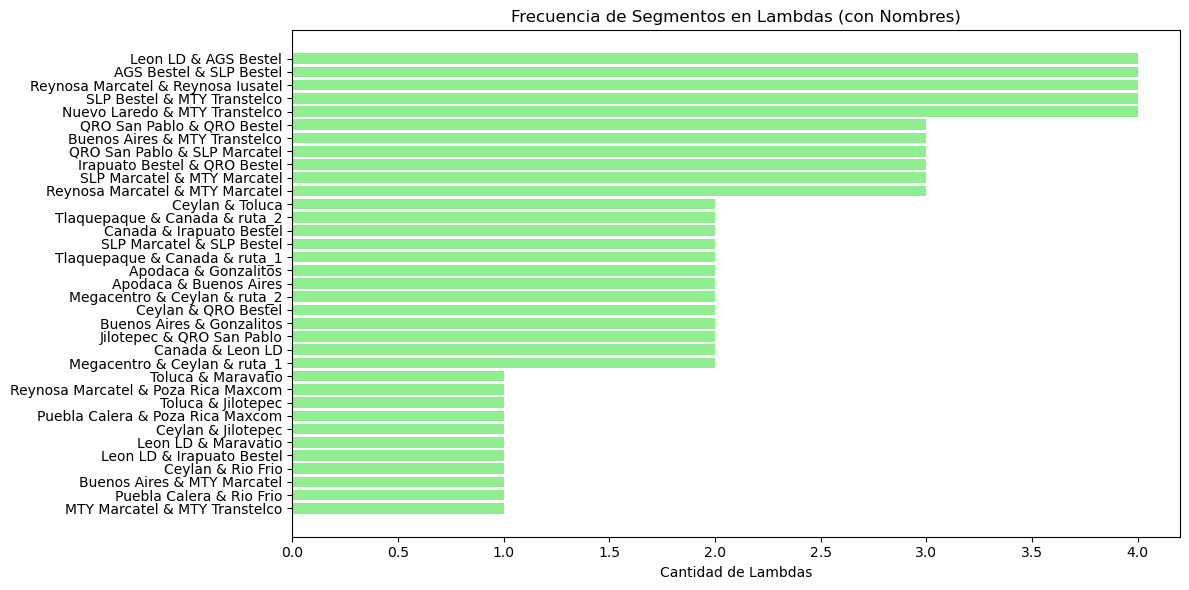

In [1]:
import matplotlib.pyplot as plt

#############################################################
# This file simulates failures on the ISP_Tx DWDM Network
#############################################################

# Mapping site IDs to human-readable descriptions
SITE_ID_TO_NAME = {
    "MSOTOL01": "Toluca",
    "NFO-117": "Maravatio",
    "NFO-006": "Leon LD",
    "NFO-027": "AGS Bestel",
    "NFO-044": "SLP Bestel",
    "NFO-025": "SLP Marcatel",
    "NFO-075": "MTY Marcatel",
    "NFO-076": "MTY Transtelco",
    "NFO-038": "Nuevo Laredo",
    "MSOMTY02": "Buenos Aires",
    "MSOMTY01": "Apodaca",
    "NFO-009": "QRO San Pablo",
    "NFO-040": "QRO Bestel",
    "MSOMEX04": "Ceylan",
    "MSOMEX01": "Megacentro",
    "MSOGDL02": "Canada",
    "MSOGDL01": "Tlaquepaque",
    "TAMREY1273": "Reynosa Iusatel",
    "NFO-022": "Reynosa Marcatel",
    "NFO-053": "Poza Rica Maxcom",
    "MSOPUE01": "Puebla Calera",
    "NFO-010": "Rio Frio",
    "NFO-004": "Jilotepec",
    "NFO-032": "Irapuato Bestel",
    "MSOMTY03": "Gonzalitos",
}

# Each lambda represents a path in the DWDM network, defined by its segments (sets of site IDs)
LAMBDA_PATHS = [
    {
        "name": "Laredo to Toluca",
        "segments": [
            {"NFO-038", "NFO-076"},
            {"NFO-076", "NFO-075"},
            {"NFO-075", "NFO-025"},
            {"NFO-025", "NFO-044"},
            {"NFO-044", "NFO-027"},
            {"NFO-027", "NFO-006"},
            {"NFO-006", "NFO-117"},
            {"NFO-117", "MSOTOL01"},
        ]
    },
    {
        "name": "Laredo to Apodaca",
        "segments": [
            {"NFO-038", "NFO-076"},
            {"NFO-076", "MSOMTY02"},
            {"MSOMTY02", "MSOMTY01"}
        ]
    },
    {
        "name": "Laredo to Megacentro",
        "segments": [
            {"NFO-038", "NFO-076"},
            {"NFO-076", "NFO-044"},
            {"NFO-044", "NFO-025"},
            {"NFO-025", "NFO-009"},
            {"NFO-009", "NFO-040"},
            {"NFO-040", "MSOMEX04"},
            {"MSOMEX04", "MSOMEX01", "ruta_2"}
        ]
    },
    {
        "name": "Laredo to Tlaquepaque",
        "segments": [
            {"NFO-038", "NFO-076"},
            {"NFO-076", "NFO-044"},
            {"NFO-044", "NFO-027"},
            {"NFO-027", "NFO-006"},
            {"NFO-006", "MSOGDL02"},
            {"MSOGDL02", "MSOGDL01", "ruta_1"}
        ]
    },
    {
        "name": "Reynosa to Toluca",
        "segments": [
            {"TAMREY1273", "NFO-022"},
            {"NFO-022", "NFO-053"},
            {"NFO-053", "MSOPUE01"},
            {"MSOPUE01", "NFO-010"},
            {"NFO-010", "MSOMEX04"},
            {"MSOMEX04", "MSOTOL01"}
        ]
    },
    {
        "name": "Reynosa to Megacentro",
        "segments": [
            {"TAMREY1273", "NFO-022"},
            {"NFO-022", "NFO-075"},
            {"NFO-075", "NFO-025"},
            {"NFO-025", "NFO-009"},
            {"NFO-009", "NFO-004"},
            {"NFO-004", "MSOMEX04"},
            {"MSOMEX04", "MSOMEX01", "ruta_1"}
        ]
    },
    {
        "name": "Reynosa to Tlaquepaque",
        "segments": [
            {"TAMREY1273", "NFO-022"},
            {"NFO-022", "NFO-075"},
            {"NFO-075", "NFO-025"},
            {"NFO-025", "NFO-009"},
            {"NFO-009", "NFO-040"},
            {"NFO-040", "NFO-032"},
            {"NFO-032", "MSOGDL02"},
            {"MSOGDL02", "MSOGDL01", "ruta_2"}
        ]
    },
    {
        "name": "Reynosa to Apodaca",
        "segments": [
            {"TAMREY1273", "NFO-022"},
            {"NFO-022", "NFO-075"},
            {"NFO-075", "MSOMTY02"},
            {"MSOMTY02", "MSOMTY03"},
            {"MSOMTY03", "MSOMTY01"}
        ]
    },
    {
        "name": "Megacentro to Toluca",
        "segments": [
            {"MSOMEX01", "MSOMEX04", "ruta_1"},
            {"MSOMEX04", "MSOTOL01"}
        ]
    },
    {
        "name": "Toluca to Tlaquepaque",
        "segments": [
            {"MSOTOL01", "NFO-004"},
            {"NFO-004", "NFO-009"},
            {"NFO-009", "NFO-040"},
            {"NFO-040", "NFO-032"},
            {"NFO-032", "MSOGDL02"},
            {"MSOGDL02", "MSOGDL01", "ruta_2"}
        ]
    },
    {
        "name": "Tlaquepaque to Apodaca",
        "segments": [
            {"MSOGDL01", "MSOGDL02", "ruta_1"},
            {"MSOGDL02", "NFO-006"},
            {"NFO-006", "NFO-027"},
            {"NFO-027", "NFO-044"},
            {"NFO-044", "NFO-076"},
            {"NFO-076", "MSOMTY02"},
            {"MSOMTY02", "MSOMTY03"},
            {"MSOMTY03", "MSOMTY01"}
        ]
    },
    {
        "name": "Apodaca to Megacentro",
        "segments": [
            {"MSOMTY01", "MSOMTY02"},
            {"MSOMTY02", "NFO-076"},
            {"NFO-076", "NFO-044"},
            {"NFO-044", "NFO-027"},
            {"NFO-027", "NFO-006"},
            {"NFO-006", "NFO-032"},
            {"NFO-032", "NFO-040"},
            {"NFO-040", "MSOMEX04"},
            {"MSOMEX04", "MSOMEX01", "ruta_2"}
        ]
    }
]

def get_all_segments(lambdas):
    """Return a list of all unique segments (as sorted tuples) from all lambdas."""
    all_segments = set()
    for path in lambdas:
        for segment in path["segments"]:
            all_segments.add(tuple(sorted(segment)))
    return list(all_segments)

def create_segment_to_lambdas(unique_segments, lambdas):
    """
    Map each unique segment to a list of lambda names where it appears.
    """
    segment_to_lambdas = {}
    for segment in unique_segments:
        segment_set = set(segment)
        included_lambdas = []
        for path in lambdas:
            # Check if this segment is present in any of the path's segments
            if any(segment_set == set(s) for s in path["segments"]):
                included_lambdas.append(path["name"])
        segment_to_lambdas[segment] = included_lambdas
    return segment_to_lambdas

def plot_segment_frequencies(segment_to_lambdas, title, use_names=False):
    """
    Plot a horizontal bar chart of segment frequencies.
    If use_names is True, show site names instead of IDs.
    """
    # Sort segments by frequency descending
    sorted_items = sorted(segment_to_lambdas.items(), key=lambda x: len(x[1]), reverse=True)
    if use_names:
        def segment_to_label(segment):
            return ' & '.join(SITE_ID_TO_NAME.get(site, site) for site in segment)
    else:
        def segment_to_label(segment):
            return ' & '.join(segment)
    labels = [segment_to_label(item[0]) for item in sorted_items]
    frequencies = [len(item[1]) for item in sorted_items]

    plt.figure(figsize=(12, 6))
    plt.barh(labels, frequencies, color='skyblue' if not use_names else 'lightgreen')
    plt.xlabel('Cantidad de Lambdas')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Get all unique segments
    unique_segments = get_all_segments(LAMBDA_PATHS)
    print("All unique segments in all the lambdas:")
    print(f"Total unique segments: {len(unique_segments)}")
    print(unique_segments)

    # Map each segment to the list of lambdas where it appears
    segment_to_lambdas = create_segment_to_lambdas(unique_segments, LAMBDA_PATHS)

    # Print segment lists for each unique segment
    print("\nSegment lists for each unique segment:")
    for i, segment in enumerate(unique_segments):
        print(f"Segment {i + 1}: {segment} -> Lambdas: {segment_to_lambdas[segment]}")

    # Plot segment frequencies (by Site ID)
    plot_segment_frequencies(
        segment_to_lambdas,
        title='Frecuencia de Segmentos en Lambdas (por Site ID)',
        use_names=False
    )

    # Plot segment frequencies (by Site Name)
    plot_segment_frequencies(
        segment_to_lambdas,
        title='Frecuencia de Segmentos en Lambdas (con Nombres)',
        use_names=True
    )
